# Test and training datasets

The data we use to train a model is often called a training dataset. We’ve already seen this in action. Frustratingly, when we use the model in the real world, after training we don’t know for certain how well our model will work. This uncertainty is because it’s possible that our training dataset is different to data in the real world.

## What is overfitting?
A model is overfit if it works better on the training data than it does on other data. The name refers to the fact that the model has been fit so well that it's memorized details of the training set rather than finding broad rules that will apply to other data. Overfitting is common, but not desirable. At the end of the day, we only care how well our model works on real-world data.

## How can we avoid overfitting?
We can avoid overfitting several ways. The simplest way is to have a simpler model, or to use a dataset that's a better representation of what is seen in the real world. To understand these methods, consider a scenario where real-world data look like so:

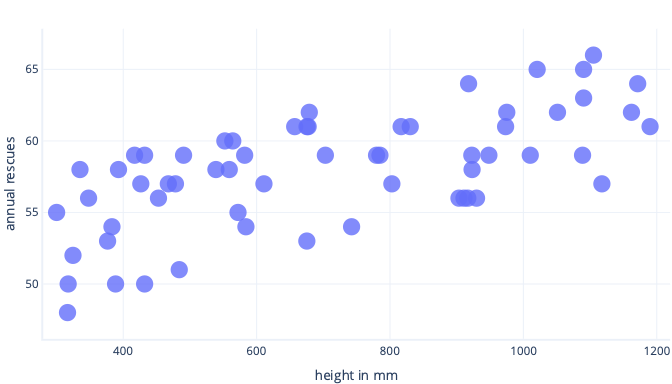

Let’s say we collect information about only five dogs, though, and use that as our training dataset to fit a complex line. If we can do so, we can fit it very well:

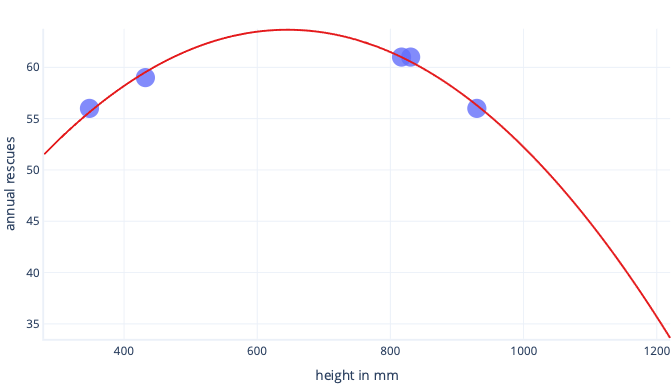

When this is used in the real world, though, we'll find it makes predictions that turn out to be wrong:

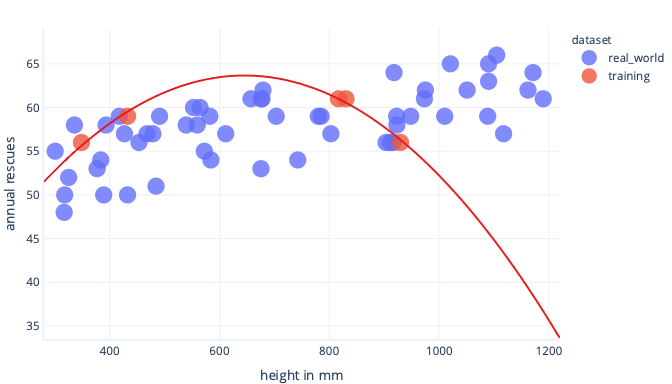

If we have a more representative dataset and a simpler model, the line we fit turns out to make better (although not perfect) predictions:

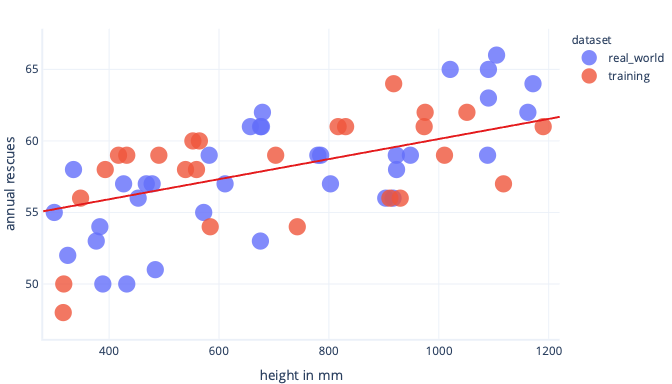

A complimentary way we can avoid overfitting is to stop training after the model has learned general rules, but before the model is overfit. This requires detecting when we're beginning to overfit our model, though. We can do this using a test dataset.

## What is a test dataset?
A test dataset, also called a validation dataset, is a set of data similar to the training dataset. In fact, test datasets are usually created by taking a large dataset and splitting it. One portion is called the training dataset, and the other is called the test dataset.

The job of the training dataset is to train the model; we’ve seen training already. The job of the test dataset is to check how well the model works; it doesn't contribute to training directly.



## OK, but what’s the point?
The point of a test dataset is twofold.

First, if test performance stops improving during training, we can stop; there's no point in continuing. If we do continue, we can end up encouraging the model to learn details about the training dataset that aren't in the test dataset, which is overfitting.

Secondly, we can use a test dataset after training. This gives us an indication of how well the final model will work when it sees "real-world" data it hasn't seen before.

## What does that mean for cost functions?
When we use both training and test datasets, we end up calculating two cost functions.

The first cost function is using the training dataset, just like we've seen before. This cost function is fed to the optimizer and used to train the model.

The second cost function is calculated using the test dataset. We use this to check how well the model might work in the real world. The result of the cost function isn't used to train the model. To calculate this, we pause training, look at how well the model is performing on a test dataset, and then resume training.

# Nuances of test sets

Test sets are considered best practice for most aspects of machine learning, though the field is still relatively young, and so exactly how and when is often debated. Let’s go through some things to consider.

## Test sets can be misleading
Although test sets are helpful to identify overtraining, they can provide us with false confidence. Specifically, test sets are only useful if they reflect data that we expect to see in the real world. For example, our test set is very small, so it won't be representative of the variety of data that we're likely to see in the real world. Test datasets are also only as good as their source. If our test dataset comes from a biased source, our metrics won't reflect how things will behave in the real world.

For example, let’s say we're trying to find the relationship between number of rescues and the age a dog started training. If our test set was only three dogs, it's possible that these dogs aren't a good representation of the wide variety of working dogs in the real world. Also, imagine that we obtained our test set from a single breeder who doesn't know how to work with puppies. Our model might predict that older dogs are best to train, and our test dataset would confirm this, when in fact other trainers might have enormous success with younger animals.

## Test sets aren't free
We’ve already seen that the more training data we have, the less likely our model will overfit. Similarly, the larger the test sets, the more we feel we can trust our test results. However, we usually work with finite amounts of data, and a datapoint can't be in both the training and the test set. This means that as we get larger test sets, we get smaller training datasets and vice versa. Exactly how much data should be sacrificed to appear in the test dataset depends on individual circumstances, with anything between 10-50% being relatively common, depending on the volume of data available.

## Train and test isn't the only approach
It’s worth keeping in mind that train-and-test is common, but not the only widely used approach. Two of the more common alternatives are the _hold-out approach_ and _statistical approach_ methods.

### The hold-out approach
The hold-out approach is like train-and-test, but instead of splitting a dataset into two, it's split into three: _training_, _test_ (also known as _validation_), and _hold-out_. The training and test datasets are as we’ve described previously. The hold-out dataset is a kind of test set that's used only once, when we're ready to deploy our model for real-world use. In other words, it's not used until we've finished experimenting with different kinds of training regimens, different kinds of models, and so on.

This approach tackles the fact that we usually experiment with different models and training regimens. For example, we fit a model, find it doesn't work well with the test dataset, change some aspects of the model being trained, and try again until we get a good result. This means we're purposefully altering our model to work for a particular set of data, just like normal training does with the training dataset. By doing this, we can end up with a model that's essentially too overtrained to work on our test dataset.

The idea of a third dataset is that we can test for this, too. This approach means splitting the data three ways, which means we start with even less training data. If we don't have a lot of data to work with, this approach can reduce our ability to obtain a good model.



### Statistical approaches
Simpler models that have originated in statistics often don't need test datasets. Instead, we can calculate what degree the model is overfit directly as statistical significance: a _p-value_.

These statistical methods are powerful, well established, and form the foundation of modern science. The advantage is that the training set doesn't ever need to be split, and we get a much more precise understanding of how confident we can be about a model. For example, a p-value of 0.01 means there's a very small chance that our model has found a relationship that doesn't actually exist in the real world. By contrast, a p-value of 0.5 means that while our model might look good with our training data, it will be no better than flipping a coin in the real world.

The downside to these approaches is that they're only easily applied to certain model types, such as the linear regression models with which we've been practicing. For all but the simplest models, these calculations can be extremely complex to perform properly, and so are out of scope for the current course. They also suffer the same limitation regarding data selection; if our training data is biased, our p-values will be misleading.